In [1]:
import pandas as pd

import numpy as np

import pickle

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import sklearn

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import RandomizedSearchCV

import imblearn

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
data = pd.read_csv('2.loan_approval.csv')

In [3]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

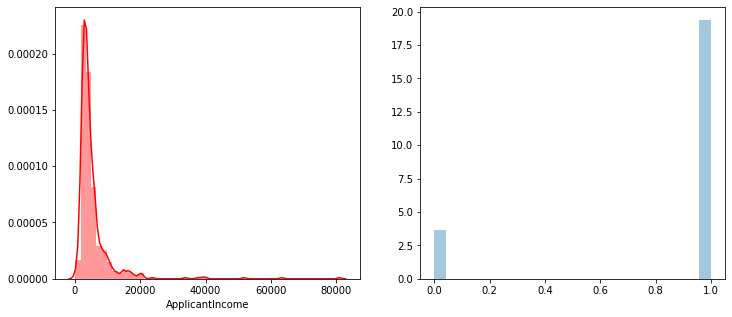

In [5]:
plt.figure(figsize=(12,5))

plt.subplot(121)

sns.distplot(data['ApplicantIncome'], color='r')

plt.subplot(122)

sns.distplot(data['Credit_History'])

plt.show()

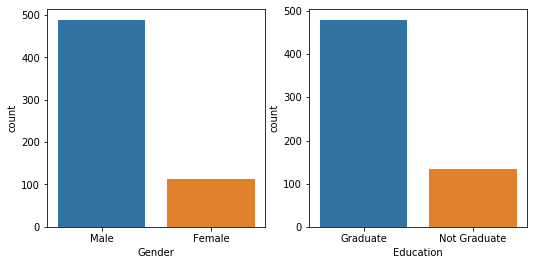

In [6]:
plt.figure(figsize=(18,4))

plt.subplot(1,4,1)

sns.countplot(data['Gender'])

plt.subplot(1,4,2)

sns.countplot(data['Education'])

plt.show()

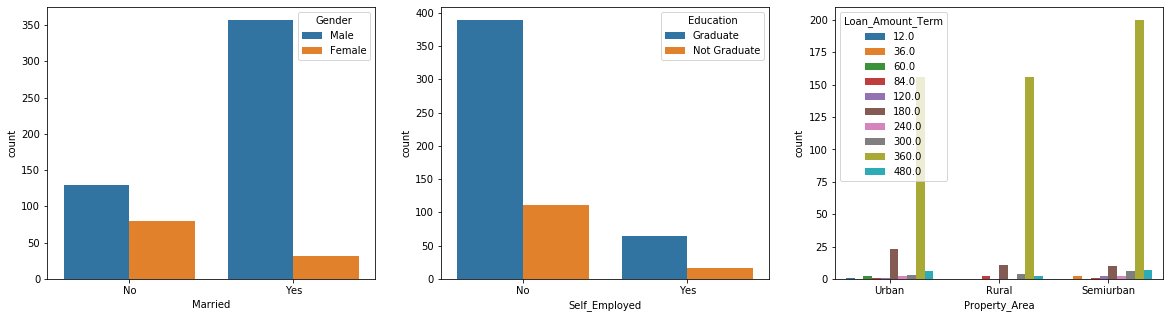

In [7]:
plt.figure(figsize=(20,5))

plt.subplot(131)

sns.countplot(data[ 'Married'], hue=data['Gender'])

plt.subplot(132)

sns.countplot(data['Self_Employed'], hue=data['Education'])

plt.subplot(133)

sns.countplot(data[ 'Property_Area'], hue=data['Loan_Amount_Term'])

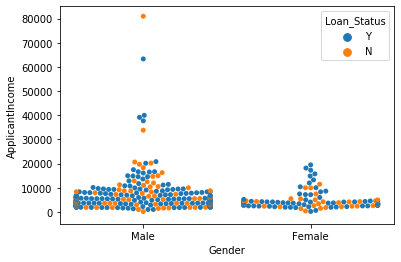

In [8]:
sns.swarmplot(data['Gender'], data['ApplicantIncome'], hue = data['Loan_Status'])

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [11]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

#replacing + with space for filling the nan values

data['Dependents'] = data['Dependents'].str.replace('+',' ')

data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])

data['Self_Employed'] = data['Self_Employed'].fillna (data['Self_Employed'].mode()[0])

data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])

data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna (data['Loan_Amount_Term'].mode()[0])

data['Credit_History'] = data['Credit_History'].fillna (data['Credit_History'].mode()[0])

In [13]:
data['Gender']=data['Gender'].map({'Female':1, 'Male':0})

data['Property_Area']=data['Property_Area'].map({"Urban": 2, "Semiurban": 1, "Rural":0})

data['Married']=data['Married'].map({'Yes':1, 'No':0})

data['Self_Employed']=data['Self_Employed'].map({'Yes':1, 'No':0})

data['Education']=data['Education'].map({'Graduate':1, 'Not Graduate':0})

data['Loan_Status']=data['Loan_Status'].map({'Y':1, 'N':0})

In [14]:
data['Gender']=data['Gender'].astype('int64')

data['Married']=data['Married'].astype('int64')

data['Dependents']=data['Dependents'].astype('int64')

data['Self_Employed']=data['Self_Employed'].astype('int64')

data['CoapplicantIncome']=data['CoapplicantIncome'].astype('int64')
                                                           
data['LoanAmount']=data['LoanAmount'].astype('int64')

data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')

data['Credit_History']=data['Credit_History'].astype('int64')

In [15]:
from imblearn.combine import SMOTETomek

In [16]:
smote = SMOTETomek(0.90)

In [17]:
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'],axis=1)

In [18]:
x_bal,y_bal = smote.fit_resample(x,y)

In [19]:
print(y.value_counts())

print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    351
0    308
Name: Loan_Status, dtype: int64


In [20]:
sc=StandardScaler()

x_bal=sc.fit_transform(x_bal)

In [21]:
x_bal=pd.DataFrame(x_bal)

In [22]:
x_train, x_test, y_train, y_test = train_test_split( x_bal, y_bal, test_size=0.33, random_state=42)

In [23]:
def decisionTree(x_train, x_test, y_train, y_test):
    
    dt=DecisionTreeClassifier()
    
    dt.fit(x_train,y_train)

    yPred = dt.predict(x_test)
    
    print('***Decision TreeClassifier***')
    
    print('Confusion matrix')
    
    print(confusion_matrix(y_test, yPred))
    
    print('Classification report')
    
    print(classification_report (y_test, yPred))


In [24]:
def RandomForest (x_train, x_test, y_train, y_test):

    rf = RandomForestClassifier()
    
    rf.fit(x_train,y_train)
    
    yPred = rf.predict(x_test)
    
    print('***RandomForestClassifier***')
    
    print('Confusion matrix')
    
    print(confusion_matrix(y_test,yPred))
    
    print('Classification report')
    
    print(classification_report (y_test,yPred))

In [25]:
def KNN(x_train, x_test, y_train, y_test):

    knn = KNeighborsClassifier()

    knn.fit(x_train,y_train)
    
    yPred=knn.predict(x_test)

    print('***KNeighborsClassifier***')

    print('Confusion matrix')

    print(confusion_matrix(y_test,yPred))

    print('Classification report')

    print(classification_report (y_test, yPred))

In [26]:
def xgboost (x_train, x_test, y_train, y_test):

    xg = GradientBoostingClassifier()

    xg.fit(x_train,y_train)

    yPred = xg.predict(x_test)

    print('***GradientBoostingClassifier***')
    
    print('Confusion matrix')

    print(confusion_matrix (y_test,yPred))

    print('Classification report')
    
    print(classification_report (y_test, yPred))

In [27]:
RandomForest(x_train,x_test,y_train,y_test)

***RandomForestClassifier***
Confusion matrix
[[ 64  31]
 [ 15 108]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.67      0.74        95
           1       0.78      0.88      0.82       123

    accuracy                           0.79       218
   macro avg       0.79      0.78      0.78       218
weighted avg       0.79      0.79      0.79       218



In [28]:
decisionTree(x_train,x_test,y_train,y_test)

***Decision TreeClassifier***
Confusion matrix
[[58 37]
 [28 95]]
Classification report
              precision    recall  f1-score   support

           0       0.67      0.61      0.64        95
           1       0.72      0.77      0.75       123

    accuracy                           0.70       218
   macro avg       0.70      0.69      0.69       218
weighted avg       0.70      0.70      0.70       218



In [29]:
KNN(x_train,x_test,y_train,y_test)

***KNeighborsClassifier***
Confusion matrix
[[ 49  46]
 [ 15 108]]
Classification report
              precision    recall  f1-score   support

           0       0.77      0.52      0.62        95
           1       0.70      0.88      0.78       123

    accuracy                           0.72       218
   macro avg       0.73      0.70      0.70       218
weighted avg       0.73      0.72      0.71       218



In [30]:
xgboost(x_train,x_test,y_train,y_test)

***GradientBoostingClassifier***
Confusion matrix
[[ 62  33]
 [ 19 104]]
Classification report
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        95
           1       0.76      0.85      0.80       123

    accuracy                           0.76       218
   macro avg       0.76      0.75      0.75       218
weighted avg       0.76      0.76      0.76       218



In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

In [33]:
f1_score(yPred,y_test,average='weighted')

0.7917022197985503

In [34]:
cv = cross_val_score(rf,x,y,cv=5)

In [35]:
np.mean(cv)

0.7866453418632547

In [36]:
from tensorflow.keras.models import load_model

In [37]:
pickle.dump(rf,open('rdf.pkl','wb'))